# 1. 문제정의 


  ## 1.1 경진대회 소개

- 물류 유통량 예측 경진 대회 (회귀모델)

- 제주시 내 택배 운송 데이터를 이용하여 운송량 예측 AI 개발

- https://dacon.io/competitions/official/235867/overview/description

- 주최 : 국토연구원
- 주관 : 데이콘 
    ### 1.1.1 평가
  - 평가산식 : RMSE
  - Public 평가 : 테스트 데이터 중 랜덤 샘플 된 50%로 채점
  - Private 평가 : 나머지 50 % 테스트 데이터로 채점

    ### 1.1.2 배경
    - 코로나 19는 경제, 사회 분야의 구조적 변화를 촉발하여 비대면화와 디지털 전환을 가속화 시키고 있으며, 
    비대면 거래의 증가에 따라 2020년 택배 물량은 약 30억 건으로 전년 대비 21% 급증하였습니다.

    - 이에 따라 택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회를 개최합니다(사례지역:제주도).
    더욱 효율적인 물류 유통을 위해 택배 운송량을 예측해주세요! 

    ### 1.1.3 데이터 분석 대상
    - train : 총 32,000행의 데이터 5열
    - test : 총 4,640행의 데이터 4열("INVC_CONT" 제외)

    => train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"INVC_CONT "** 예측

    

## 1.2 데이터 도메인 정보
- index : 인덱스
- SEND_SPG_INNB : 송하인_격자공간고유번호
- REC_SPG_INNB : 수하인 격자공간고유번호
- DL_GD_LCLS_NM : 카테고리_대
- DL_GD_MCLS_NM : 카테고리_중
- INVC_CONT : 운송장 건 수

## 1.3 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 RMSE라는 평가척도를 적용합니다. 이 RMSE 값은 회귀모델에서 평가지표로 사용하는 지표 중 하나이다.

## 1.4 문제 해결을 위한 접근 방식


- **EDA -> 전처리 -> 데이터 모델링 -> 결과 확인 ->모델링 성능 개선**

## 1.5 섹션 아이디어

[1229]

  - 송하인이나 수하인이 같은경우? -> 고정적으로 택배 배송을 하는경우가 있을까?

# 2. 데이터 간단히 탐색

In [1]:
# 버젼 설정
today = "1229"

## 2.2 데이터 로드


### 2.2.1 학습 데이터

In [2]:
# !pip install pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 학습 데이터 로드
X = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/train.csv")

In [4]:
# 학습 데이터 기본 정보 파악
display(X.info())

display(X.head())

display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


- 송하인 격자고유번호 별로 확인?
- 수하인 격자고유번호 별로 확인

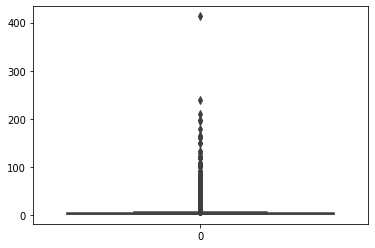

In [5]:
# 이상치 좀 더 확인
sns.boxplot(data = X['운송장_건수'])
plt.show()

- 이상치가 존재한다고 보여지는데,,,

In [6]:
#결측값 추출
display(pd.DataFrame(X.isnull().sum()).T)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,0,0,0,0


- 결측값이 없다.

In [7]:
# 중복데이터 확인
temp = X.drop("index",axis = 1)
print(temp.duplicated().sum())

display(temp[temp.duplicated()])


0


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수


- 중복데이터가 없다.

In [8]:
display(X["송하인_격자공간고유번호"].value_counts())
display(X["수하인_격자공간고유번호"].value_counts())


5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4313000554077200       1
5013000868030300       1
1165000018039100       1
2638000028097200       1
1147000002005400       1
Name: 송하인_격자공간고유번호, Length: 4229, dtype: int64

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
1141000008065400     1
4783000207071400     1
3017000014085200     1
5013000640012300     1
2726000056072100     1
Name: 수하인_격자공간고유번호, Length: 26875, dtype: int64

### 2.2.2 테스트 데이터

In [9]:
# 테스트 데이터 로드
test = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/test.csv")

In [10]:
# 테스트 데이터 기본 정보 파악
display(test.info())

display(test.head())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


,index,송하인_격자공간고유번호,수하인_격자공간고유번호
count,7920.000000,7.920000e+03,7.920000e+03
mean,3959.500000,4.637194e+15,3.807972e+15
std,2286.451399,8.524477e+14,1.321640e+15
min,0.000000,1.111000e+15,1.111000e+15
25%,1979.750000,4.579000e+15,2.826000e+15
50%,3959.500000,5.011000e+15,4.159001e+15
75%,5939.250000,5.013001e+15,5.011000e+15
max,7919.000000,5.013001e+15,5.013001e+15


In [11]:
# 중복 데이터.
display(test.drop("index",axis = 1).duplicated().sum()) 

0

In [12]:
display(test["송하인_격자공간고유번호"].value_counts())
display(test["수하인_격자공간고유번호"].value_counts())

5011000078068400    964
5013000610049100    488
5013000731055200    293
5011000137030100    259
5013000821028200    165
                   ... 
5013000733046100      1
5011000852067400      1
5013000468043100      1
5011000213083200      1
1156000014036400      1
Name: 송하인_격자공간고유번호, Length: 1812, dtype: int64

5011000488033200    8
5011000596012200    7
5011000543041100    7
5011000374043300    6
5011000314069300    6
                   ..
4111100032018400    1
5011000319069400    1
5011000373030100    1
5011000632042100    1
5011000374077100    1
Name: 수하인_격자공간고유번호, Length: 7453, dtype: int64

### 2.2.3 제출 데이터

In [13]:
# 테스트 데이터 로드
sub = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/sample_submission.csv")

In [14]:
# 테스트 데이터 기본 정보 파악
display(sub.info())

display(sub.head())

display(sub.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   7920 non-null   int64
 1   운송장_건수  7920 non-null   int64
dtypes: int64(2)
memory usage: 123.9 KB


None

,index,운송장_건수
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


,index,운송장_건수
count,7920.000000,7920.0
mean,3959.500000,0.0
std,2286.451399,0.0
min,0.000000,0.0
25%,1979.750000,0.0
50%,3959.500000,0.0
75%,5939.250000,0.0
max,7919.000000,0.0


### 2.2.4 train vs test

학습 데이터와 테스트 데이터 비교


In [15]:
def check_train_test_column_values(train, test, column):
    # 함수 정의: 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print("{} Column에 대한 train_test_values_check 입니다=======================".format(column))
    # Train/Test set의 입력 칼럼의 value를 set으로 받아줍니다.
    train_colset = set(train[column])
    test_colset  = set(test[column])

    # Train/Test-set 고유한 value의 개수를 구함.
    print(f"Train-set에 있는 고유한 value 개수 : {len(train_colset)}")
    print(f"Test-set에 있는 고유한 value 개수 : {len(test_colset)}")

    # Train/Test-set 모두에 포함되어있는 value를 구함.
    print('='* 80)
    common_colset = train_colset.intersection(test_colset)
    print(f"Train/Test-set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}")
    if len(common_colset) > 100: # value가 너무 많으면 어차피 보기 힘드므로 출력을 pass 합니다
        pass
    else:
        try: # int나 float은 sorted가 먹지 않기 때문에 try except로 넣어줍니다.
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {sorted(common_colset)}")
        except:
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {(common_colset)}")

    # Train-set에만 있는 value를 구함.
    print('='* 80)
    train_only_colset = train_colset.difference(test_colset)
    print(f"Train-set에만 있는 value는 총 {len(train_only_colset)} 개 입니다.")
    if len(train_only_colset) > 100:
        pass
    else:
        try:
            print(f"Train-set에만 있는 value는 : {sorted(train_only_colset)}")
        except:
            print(f"Train-set에만 있는 value는 : {(train_only_colset)}")

    # Test-set에만 있는 value를 구함.
    print('='* 80)
    test_only_colset = test_colset.difference(train_colset)
    print(f"Test-set에만 있는 value는 총 {len(test_only_colset)} 개 입니다.")
    if len(test_only_colset) > 100:
        pass
    else:
        try:
            print(f"Test-set에만 있는 value는 : {sorted(test_only_colset)}")
        except:
            print(f"Test-set에만 있는 value는 : {(test_only_colset)}")
    print(" ")

In [16]:
# 데이터 타입 변경
X = X.astype(object)
test = test.astype(object)
X["운송장_건수"] = X["운송장_건수"].astype(int)

display(X.info())
display(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  object
 1   송하인_격자공간고유번호  31684 non-null  object
 2   수하인_격자공간고유번호  31684 non-null  object
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   object
 1   송하인_격자공간고유번호  7920 non-null   object
 2   수하인_격자공간고유번호  7920 non-null   object
 3   물품_카테고리       7920 non-null   object
dtypes: object(4)
memory usage: 247.6+ KB


None

In [17]:
obj_cols = []
for col in X.drop('운송장_건수',axis = 1).columns:
    if X[col].dtypes == 'object':
        obj_cols.append(col)

In [18]:
for col in obj_cols:
    check_train_test_column_values(X, test, col)

index Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 31684
Test-set에 있는 고유한 value 개수 : 7920
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 7920
Train-set에만 있는 value는 총 23764 개 입니다.
Test-set에만 있는 value는 총 0 개 입니다.
Test-set에만 있는 value는 : []
 
송하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 4229
Test-set에 있는 고유한 value 개수 : 1812
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1233
Train-set에만 있는 value는 총 2996 개 입니다.
Test-set에만 있는 value는 총 579 개 입니다.
 
수하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 26875
Test-set에 있는 고유한 value 개수 : 7453
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1616
Train-set에만 있는 value는 총 25259 개 입니다.
Test-set에만 있는 value는 총 5837 개 입니다.
 
물품_카테고리 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 100
Test-set에 있는 고유한 value 개수 : 100
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 100
Train/Test-set에 공통으로 포

### 2.2.5 분포 확인


Q. 반복적으로 배송을 주고받는 곳이 존재할까?

In [19]:
# 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
X["repeat"] =  X['송하인_격자공간고유번호'].astype(str) + '_' + X['수하인_격자공간고유번호'].astype(str)
test["repeat"] =  test['송하인_격자공간고유번호'].astype(str) + '_' + test['수하인_격자공간고유번호'].astype(str)

In [20]:
X.repeat.value_counts()

4141000031030100_5013000635005300    7
4211000650079200_5011000437052400    7
1154500001021400_5011000214025100    5
4141000031030100_5011000596012200    5
4374500066090200_5011000427079100    5
                                    ..
5011000213090100_2644000164024300    1
4128500028049400_5011000253027200    1
5011001115006100_4159000253015100    1
4146100146003300_5011000318045300    1
5011000078068400_4111700011097100    1
Name: repeat, Length: 31267, dtype: int64

In [21]:
test.repeat.value_counts()

2723000088054300_5011000369090200    2
4113300012026300_5011000314069300    2
1156000020048400_5011000264027200    2
4141000031030100_5011000318044100    2
5011000078068400_4146300038096300    2
                                    ..
5013000731079400_4371000445062300    1
5011000078068400_4678000508073200    1
5011000266051200_1117000001040300    1
5011000595017300_4128500043018200    1
5011000078068400_2820000006096400    1
Name: repeat, Length: 7892, dtype: int64

A. 아직 뚜렷한 인사이트 도출 실패

In [22]:
X_g = X.groupby("송하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
송하인_격자공간고유번호,
4167000549008100,3.0
4119900011099400,3.0
5011000326002200,3.0
4119900010093100,3.0
4119900010058200,3.0
...,...
5013000865020400,120.0
4521000300033100,120.0
1165000006038300,134.0


In [23]:
X_g = X.groupby("수하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
수하인_격자공간고유번호,
4146300030036400,3.0
4159000019040400,3.0
4159000019070400,3.0
4159000077059300,3.0
4159000104026400,3.0
...,...
4111700027062300,109.0
5011000168096300,143.0
5011000313002100,160.0


In [24]:
X_g = X.groupby("물품_카테고리").mean().sort_values(by = "운송장_건수" ,ascending = False)
display(X_g)

,운송장_건수
물품_카테고리,
선케어,24.000000
게임기/타이틀,14.500000
기타패션잡화,13.818182
기타패션의류,12.889831
낚시,12.866667
...,...
하의,3.306667
눈관리용품,3.285714
스포츠잡화,3.250000


대량 구매 가능(?) 여부를 체크

## 2.3 섹션 아이디어

- [1229]
  - 카테고리를 숫자형으로 인코딩하여 진행? or 원핫 인코딩
  - train / test 데이터 차이 확인 -> 송하인, 수신인에 공통되는 데이터가 존재...
  - train의 타겟 데이터에 이상치가 존재한다고 보여진다.
  - '송하인 + 수신인' 열 생성하여 반복적으로 배송을 요청하는 열 새로 생성
  - 격자 공간데이터에 대한 정보가 추가적으로 필요할 것으로 판단. (예상) - 격자 공간에 지역 정보가 담겨 있을것이다. 이를 통해 시나 구로 데이터를 나누어 분석 진행시 분석에 효율적인 파생변수를 얻어낼수 있을 것이라 판단.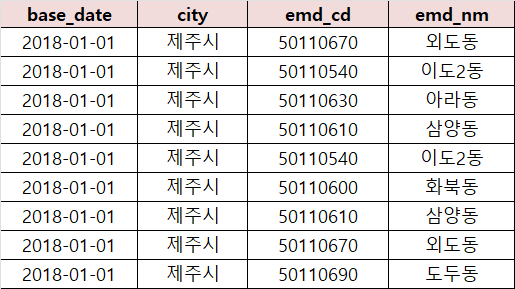

# 3. 데이터 전처리

## 3.1 결측치 처리

## 3.2 이상치 처리

## 3.3 파생변수 

### 3.3.1 repeat 열 생성 및 확인

In [25]:
# # 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
# X["repeat"] =  X['SEND_SPG_INNB'].astype(str) + '_' + X['REC_SPG_INNB'].astype(str)
# test["repeat"] =  test['SEND_SPG_INNB'].astype(str) + '_' + test['REC_SPG_INNB'].astype(str)

## 3.4 원-핫 인코딩

In [26]:
# 수치형 변수 추출
v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
tr_i = X[v_i]
tr_s = X.drop(v_i,axis=1)
tr_s = tr_s.drop(["index","운송장_건수"],axis = 1)
tr_t = X["운송장_건수"]

In [27]:
# 수치형 변수 추출
v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
te_i = test[v_i]
te_s = test.drop(v_i,axis=1) 
te_s = te_s.drop("index",axis = 1)


In [28]:
tr_dummy = pd.get_dummies(tr_s)
te_dummy = pd.get_dummies(te_s)
display(tr_dummy)

,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,물품_카테고리_공구,물품_카테고리_과자,물품_카테고리_구강위생용품,물품_카테고리_기능성,물품_카테고리_기저귀/물티슈,물품_카테고리_기타디지털/가전,물품_카테고리_기타스포츠/레저,물품_카테고리_기타식품,물품_카테고리_기타출산/육아,물품_카테고리_기타패션의류,물품_카테고리_기타패션잡화,물품_카테고리_기타화장품/미용,물품_카테고리_김치,물품_카테고리_낚시,물품_카테고리_남성화장품,물품_카테고리_냉동/간편조리식품,물품_카테고리_네일케어,물품_카테고리_농산물,물품_카테고리_눈관리용품,물품_카테고리_다이어트식품,물품_카테고리_등산,물품_카테고리_모니터,물품_카테고리_모자,물품_카테고리_문구/사무용품,물품_카테고리_문화컨텐츠,물품_카테고리_바디케어,물품_카테고리_반려동물,물품_카테고리_반찬,물품_카테고리_베이스메이크업,물품_카테고리_분유/이유식/아기간식,...,물품_카테고리_언더웨어,물품_카테고리_완구/매트,물품_카테고리_욕실용품,물품_카테고리_원피스/점프슈트,물품_카테고리_위생/건강용품,물품_카테고리_유아가구,물품_카테고리_음료,물품_카테고리_음반,물품_카테고리_음향가전,물품_카테고리_의료용품,물품_카테고리_이미용가전,물품_카테고리_인테리어소품,물품_카테고리_자동차용품,물품_카테고리_잠옷,물품_카테고리_재활운동용품,물품_카테고리_주방가구,물품_카테고리_주방가전,물품_카테고리_주방용품,물품_카테고리_주얼리,물품_카테고리_지갑,물품_카테고리_축산,물품_카테고리_출산/유아동의류,물품_카테고리_출산/유아동잡화,물품_카테고리_취미용품,물품_카테고리_침구단품,물품_카테고리_침구세트,물품_카테고리_침실가구,물품_카테고리_카페트/러그,물품_카테고리_캠핑,물품_카테고리_커튼/블라인드,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.5 라벨 인코딩

In [27]:
# # 오브젝트형 column 가지고 오기
# ob_col = X.columns[X.dtypes==object]
# print(ob_col)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for i in ob_col:
#   X[i] = le.fit_transform(X[i])
#   test[i] = le.transform(test[i])

# y = X["credit"]
# X = X.drop("credit",axis = 1)
# X = X.drop("index",axis = 1)
# test = test.drop("index",axis = 1)

#  # 데이터 저장
# X.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
# y.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
# test.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")


## 3.6 데이터 통합

In [29]:
#수치형 변수와 범주형 변수 데이터열 합성
new_X = pd.concat([tr_i,tr_dummy],axis= 1)
new_test = pd.concat([te_i,te_dummy],axis= 1)
y = tr_t.astype(int)
display(new_X.info())
display(new_test.info())
# display(tr_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Columns: 103 entries, 송하인_격자공간고유번호 to 물품_카테고리_홈데코
dtypes: object(3), uint8(100)
memory usage: 3.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Columns: 103 entries, 송하인_격자공간고유번호 to 물품_카테고리_홈데코
dtypes: object(3), uint8(100)
memory usage: 959.2+ KB


None

## 3.7 정규화

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# sc = StandardScaler()
# new_X[v_i] = sc.fit_transform(new_X[v_i])
# new_test[v_i] = sc.transform(new_test[v_i])

## 3.8 클러스터링
- 타겟을 결정짓는 뚜렷한 특징을 갖는 피쳐를 찾지 못해 clustering 시도


In [30]:
from sklearn.cluster import KMeans

In [31]:
# 클러스터링 진행
# temp_k = new_X.drop("ID",axis = 1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(new_X)
new_X['cluster'] = kmeans.predict(new_X)
new_test['cluster'] = kmeans.predict(new_test)

## 3.9 최종 데이터 확인 및 저장


In [32]:
# 학습 데이터 기본 정보 파악
display(new_X.info())

display(new_X.head().T)

display(new_X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Columns: 104 entries, 송하인_격자공간고유번호 to cluster
dtypes: int32(1), object(3), uint8(100)
memory usage: 3.9+ MB


None

,0,1,2,3,4
송하인_격자공간고유번호,5011000595017300,4148000690043300,5011000078068400,4127100048006400,5011000078068400
수하인_격자공간고유번호,2871000192069300,5011000264024400,1120000007005400,5011000587019400,2823700010076300
repeat,5011000595017300_2871000192069300,4148000690043300_5011000264024400,5011000078068400_1120000007005400,4127100048006400_5011000587019400,5011000078068400_2823700010076300
물품_카테고리_DIY자재/용품,0,0,0,0,0
물품_카테고리_PC,0,0,0,0,0
...,...,...,...,...,...
물품_카테고리_헤어액세서리,0,0,0,0,0
물품_카테고리_헤어케어,0,0,0,0,0
물품_카테고리_헬스,0,0,0,0,0
물품_카테고리_홈데코,0,0,0,0,0


,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,물품_카테고리_공구,물품_카테고리_과자,물품_카테고리_구강위생용품,물품_카테고리_기능성,물품_카테고리_기저귀/물티슈,물품_카테고리_기타디지털/가전,물품_카테고리_기타스포츠/레저,물품_카테고리_기타식품,물품_카테고리_기타출산/육아,물품_카테고리_기타패션의류,물품_카테고리_기타패션잡화,물품_카테고리_기타화장품/미용,물품_카테고리_김치,물품_카테고리_낚시,물품_카테고리_남성화장품,물품_카테고리_냉동/간편조리식품,물품_카테고리_네일케어,물품_카테고리_농산물,물품_카테고리_눈관리용품,물품_카테고리_다이어트식품,물품_카테고리_등산,물품_카테고리_모니터,물품_카테고리_모자,물품_카테고리_문구/사무용품,물품_카테고리_문화컨텐츠,물품_카테고리_바디케어,물품_카테고리_반려동물,물품_카테고리_반찬,물품_카테고리_베이스메이크업,물품_카테고리_분유/이유식/아기간식,...,물품_카테고리_완구/매트,물품_카테고리_욕실용품,물품_카테고리_원피스/점프슈트,물품_카테고리_위생/건강용품,물품_카테고리_유아가구,물품_카테고리_음료,물품_카테고리_음반,물품_카테고리_음향가전,물품_카테고리_의료용품,물품_카테고리_이미용가전,물품_카테고리_인테리어소품,물품_카테고리_자동차용품,물품_카테고리_잠옷,물품_카테고리_재활운동용품,물품_카테고리_주방가구,물품_카테고리_주방가전,물품_카테고리_주방용품,물품_카테고리_주얼리,물품_카테고리_지갑,물품_카테고리_축산,물품_카테고리_출산/유아동의류,물품_카테고리_출산/유아동잡화,물품_카테고리_취미용품,물품_카테고리_침구단품,물품_카테고리_침구세트,물품_카테고리_침실가구,물품_카테고리_카페트/러그,물품_카테고리_캠핑,물품_카테고리_커튼/블라인드,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코,cluster
count,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.00000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,...,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000,31684.000000
mean,0.001136,0.000947,0.000252,0.026701,0.000252,0.018653,0.005113,0.000189,0.001010,0.000568,0.002998,0.01010,0.000221,0.000537,0.004103,0.006944,0.000947,0.022030,0.000126,0.007449,0.000347,0.003219,0.001136,0.000947,0.000221,0.011836,0.000537,0.641365,0.000221,0.002904,0.000631,0.000284,0.000252,0.005271,0.034434,0.000884,0.009942,0.000442,0.000947,0.000694,...,0.001357,0.000379,0.000726,0.001357,0.000126,0.032635,0.018180,0.001042,0.002588,0.001610,0.002272,0.001010,0.000631,0.000316,0.001042,0.001515,0.009469,0.000316,0.000158,0.012088,0.000284,0.000189,0.002083,0.001831,0.000442,0.000915,0.000316,0.000189,0.000568,0.001010,0.000126,0.000442,0.004734,0.000221,0.000189,0.000221,0.001452,0.000442,0.000726,15.008522
std,0.033689,0.030757,0.015888,0.161211,0.015888,0.135298,0.071323,0.013760,0.031765,0.023829,0.054676,0.09999,0.014862,0.023158,0.063924,0.083040,0.030757,0.146784,0.011235,0.085984,0.018630,0.056648,0.033689,0.030757,0.014862,0.108148,0.023158,0.479607,0.014862,0.053808,0.025117,0.016852,0.015888,0.072410,0.182343,0.029715,0.099214,0.021016,0.030757,0.026342,...,0.036815,0.019458,0.026934,0.036815,0.011235,0.177682,0.133602,0.032257,0.050808,0.040089,0.047617,0.031765,0.025117,0.017763,0.032257,0.038894,0.096846,0.017763,0.012561,0.109281,0.016852,0.013760,0.045594,0.042747,0.021016,0.030240,0.017763,0.013760,0.023829,0.031765,0.011235,0.021016,0.068644,0.014862,0.013760,0.014862,0.038076,0.021016,0.026934,14.527637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000

In [33]:
display(new_test.info())

display(new_test.head().T)

display(new_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Columns: 104 entries, 송하인_격자공간고유번호 to cluster
dtypes: int32(1), object(3), uint8(100)
memory usage: 990.1+ KB


None

,0,1,2,3,4
송하인_격자공간고유번호,4167000577042200,1156000009012200,4122000363057300,5011000436041400,4150000241065200
수하인_격자공간고유번호,5011000435014100,5011000172034400,5011000361097300,2826000084036400,5011000169044300
repeat,4167000577042200_5011000435014100,1156000009012200_5011000172034400,4122000363057300_5011000361097300,5011000436041400_2826000084036400,4150000241065200_5011000169044300
물품_카테고리_DIY자재/용품,0,0,0,0,0
물품_카테고리_PC,0,0,0,0,0
...,...,...,...,...,...
물품_카테고리_헤어액세서리,0,0,0,0,0
물품_카테고리_헤어케어,0,0,0,0,0
물품_카테고리_헬스,0,0,0,0,0
물품_카테고리_홈데코,0,0,0,0,0


,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,물품_카테고리_공구,물품_카테고리_과자,물품_카테고리_구강위생용품,물품_카테고리_기능성,물품_카테고리_기저귀/물티슈,물품_카테고리_기타디지털/가전,물품_카테고리_기타스포츠/레저,물품_카테고리_기타식품,물품_카테고리_기타출산/육아,물품_카테고리_기타패션의류,물품_카테고리_기타패션잡화,물품_카테고리_기타화장품/미용,물품_카테고리_김치,물품_카테고리_낚시,물품_카테고리_남성화장품,물품_카테고리_냉동/간편조리식품,물품_카테고리_네일케어,물품_카테고리_농산물,물품_카테고리_눈관리용품,물품_카테고리_다이어트식품,물품_카테고리_등산,물품_카테고리_모니터,물품_카테고리_모자,물품_카테고리_문구/사무용품,물품_카테고리_문화컨텐츠,물품_카테고리_바디케어,물품_카테고리_반려동물,물품_카테고리_반찬,물품_카테고리_베이스메이크업,물품_카테고리_분유/이유식/아기간식,...,물품_카테고리_완구/매트,물품_카테고리_욕실용품,물품_카테고리_원피스/점프슈트,물품_카테고리_위생/건강용품,물품_카테고리_유아가구,물품_카테고리_음료,물품_카테고리_음반,물품_카테고리_음향가전,물품_카테고리_의료용품,물품_카테고리_이미용가전,물품_카테고리_인테리어소품,물품_카테고리_자동차용품,물품_카테고리_잠옷,물품_카테고리_재활운동용품,물품_카테고리_주방가구,물품_카테고리_주방가전,물품_카테고리_주방용품,물품_카테고리_주얼리,물품_카테고리_지갑,물품_카테고리_축산,물품_카테고리_출산/유아동의류,물품_카테고리_출산/유아동잡화,물품_카테고리_취미용품,물품_카테고리_침구단품,물품_카테고리_침구세트,물품_카테고리_침실가구,물품_카테고리_카페트/러그,물품_카테고리_캠핑,물품_카테고리_커튼/블라인드,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코,cluster
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.00000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,...,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,0.001136,0.001010,0.000253,0.026641,0.000379,0.018687,0.005177,0.000126,0.001010,0.000505,0.002904,0.010101,0.000253,0.000505,0.00404,0.006944,0.000884,0.022096,0.000126,0.007576,0.000379,0.003283,0.001136,0.000884,0.000126,0.011742,0.000505,0.641414,0.000253,0.002778,0.000505,0.000379,0.000253,0.005177,0.034343,0.000884,0.009975,0.000379,0.000884,0.000758,...,0.001389,0.000379,0.000758,0.001263,0.000126,0.032702,0.018182,0.001010,0.002525,0.001641,0.002146,0.000884,0.000631,0.000379,0.001136,0.001515,0.009470,0.000379,0.000126,0.012121,0.000253,0.000253,0.002146,0.001894,0.000379,0.000884,0.000253,0.000253,0.000505,0.001010,0.000126,0.000379,0.004798,0.000253,0.000126,0.000253,0.001515,0.000505,0.000758,15.233081
std,0.033693,0.031768,0.015890,0.161043,0.019460,0.135425,0.071768,0.011237,0.031768,0.022469,0.053814,0.100001,0.015890,0.022469,0.06344,0.083049,0.029718,0.147005,0.011237,0.086714,0.019460,0.057205,0.033693,0.029718,0.011237,0.107731,0.022469,0.479616,0.015890,0.052635,0.022469,0.019460,0.015890,0.071768,0.182121,0.029718,0.099381,0.019460,0.029718,0.027515,...,0.037244,0.019460,0.027515,0.035513,0.011237,0.177867,0.133617,0.031768,0.050192,0.040484,0.046283,0.029718,0.025120,0.019460,0.033693,0.038898,0.096857,0.019460,0.011237,0.109434,0.015890,0.015890,0.046283,0.043481,0.019460,0.029718,0.015890,0.015890,0.022469,0.031768,0.011237,0.019460,0.069105,0.015890,0.011237,0.015890,0.038898,0.022469,0.027515,14.492561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [34]:
# 데이터 저장
new_X.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
y.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
new_test.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")

# 4. 데이터 분할

## 4.1 데이터 분할

In [35]:
#앞에 저장한 데이터 로드

X = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today), encoding = "cp949")
y = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today), encoding = "cp949")
test = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today), encoding = "cp949")

In [36]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y["운송장_건수"],test_size = 0.33, random_state = 42)

In [37]:
# AutoML을 위한 데이터셋 변형
X = pd.concat([X,y],axis = 1 )
display(X)
display(test)

,송하인_격자공간고유번호,수하인_격자공간고유번호,repeat,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,물품_카테고리_공구,물품_카테고리_과자,물품_카테고리_구강위생용품,물품_카테고리_기능성,물품_카테고리_기저귀/물티슈,물품_카테고리_기타디지털/가전,물품_카테고리_기타스포츠/레저,물품_카테고리_기타식품,물품_카테고리_기타출산/육아,물품_카테고리_기타패션의류,물품_카테고리_기타패션잡화,물품_카테고리_기타화장품/미용,물품_카테고리_김치,물품_카테고리_낚시,물품_카테고리_남성화장품,물품_카테고리_냉동/간편조리식품,물품_카테고리_네일케어,물품_카테고리_농산물,물품_카테고리_눈관리용품,물품_카테고리_다이어트식품,물품_카테고리_등산,물품_카테고리_모니터,물품_카테고리_모자,물품_카테고리_문구/사무용품,물품_카테고리_문화컨텐츠,물품_카테고리_바디케어,물품_카테고리_반려동물,...,물품_카테고리_욕실용품,물품_카테고리_원피스/점프슈트,물품_카테고리_위생/건강용품,물품_카테고리_유아가구,물품_카테고리_음료,물품_카테고리_음반,물품_카테고리_음향가전,물품_카테고리_의료용품,물품_카테고리_이미용가전,물품_카테고리_인테리어소품,물품_카테고리_자동차용품,물품_카테고리_잠옷,물품_카테고리_재활운동용품,물품_카테고리_주방가구,물품_카테고리_주방가전,물품_카테고리_주방용품,물품_카테고리_주얼리,물품_카테고리_지갑,물품_카테고리_축산,물품_카테고리_출산/유아동의류,물품_카테고리_출산/유아동잡화,물품_카테고리_취미용품,물품_카테고리_침구단품,물품_카테고리_침구세트,물품_카테고리_침실가구,물품_카테고리_카페트/러그,물품_카테고리_캠핑,물품_카테고리_커튼/블라인드,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코,cluster,운송장_건수
0,5011000595017300,2871000192069300,5011000595017300_2871000192069300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,4148000690043300,5011000264024400,4148000690043300_5011000264024400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,3
2,5011000078068400,1120000007005400,5011000078068400_1120000007005400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,4127100048006400,5011000587019400,4127100048006400_5011000587019400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7
4,5011000078068400,2823700010076300,5011000078068400_2823700010076300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,4471000290087200_5011000213073200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,3
31680,1129000014045300,5011000319087100,1129000014045300_5011000319087100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4
31681,1129000014045300,5011000263065200,1129000014045300_5011000263065200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
31682,4127300065073100,5011000264061200,4127300065073100_5011000264061200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7


,송하인_격자공간고유번호,수하인_격자공간고유번호,repeat,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,물품_카테고리_공구,물품_카테고리_과자,물품_카테고리_구강위생용품,물품_카테고리_기능성,물품_카테고리_기저귀/물티슈,물품_카테고리_기타디지털/가전,물품_카테고리_기타스포츠/레저,물품_카테고리_기타식품,물품_카테고리_기타출산/육아,물품_카테고리_기타패션의류,물품_카테고리_기타패션잡화,물품_카테고리_기타화장품/미용,물품_카테고리_김치,물품_카테고리_낚시,물품_카테고리_남성화장품,물품_카테고리_냉동/간편조리식품,물품_카테고리_네일케어,물품_카테고리_농산물,물품_카테고리_눈관리용품,물품_카테고리_다이어트식품,물품_카테고리_등산,물품_카테고리_모니터,물품_카테고리_모자,물품_카테고리_문구/사무용품,물품_카테고리_문화컨텐츠,물품_카테고리_바디케어,물품_카테고리_반려동물,...,물품_카테고리_완구/매트,물품_카테고리_욕실용품,물품_카테고리_원피스/점프슈트,물품_카테고리_위생/건강용품,물품_카테고리_유아가구,물품_카테고리_음료,물품_카테고리_음반,물품_카테고리_음향가전,물품_카테고리_의료용품,물품_카테고리_이미용가전,물품_카테고리_인테리어소품,물품_카테고리_자동차용품,물품_카테고리_잠옷,물품_카테고리_재활운동용품,물품_카테고리_주방가구,물품_카테고리_주방가전,물품_카테고리_주방용품,물품_카테고리_주얼리,물품_카테고리_지갑,물품_카테고리_축산,물품_카테고리_출산/유아동의류,물품_카테고리_출산/유아동잡화,물품_카테고리_취미용품,물품_카테고리_침구단품,물품_카테고리_침구세트,물품_카테고리_침실가구,물품_카테고리_카페트/러그,물품_카테고리_캠핑,물품_카테고리_커튼/블라인드,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코,cluster
0,4167000577042200,5011000435014100,4167000577042200_5011000435014100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
1,1156000009012200,5011000172034400,1156000009012200_5011000172034400,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
2,4122000363057300,5011000361097300,4122000363057300_5011000361097300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,25
3,5011000436041400,2826000084036400,5011000436041400_2826000084036400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4150000241065200,5011000169044300,4150000241065200_5011000169044300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,5011000266051200,4623000417038100,5011000266051200_4623000417038100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7916,1154500001098300,5011000264055100,1154500001098300_5011000264055100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
7917,5013000610049100,1147000018091400,5013000610049100_1147000018091400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
7918,5013000610049100,3117000039026100,5013000610049100_3117000039026100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31


## 4.2 데이터 교차검증

# 5. 모델링

## 5.1 모델선정

In [38]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.5493143621494778

## 5.2 최적의 하이퍼파라미터 설정


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [40]:
para = {'max_depth' : [44, 46, 48],
           'min_samples_leaf' : [2,4],
           'min_samples_split' : [2,4]}

# 랜덤포레스트 모델 생성
rf = RandomForestRegressor(random_state = 42)
#그리드 서치 모델
gs = GridSearchCV(rf, param_grid = para, cv = 3)
#그리드 서치하며 학습
gs.fit(X_train,y_train)
#최적의 모델 선정
gs_best = gs.best_estimator_

display(gs.best_score_)
display(gs.best_params_)


0.09248693184593897

{'max_depth': 44, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [41]:
display(gs_best.score(X_train,y_train))

0.3138433589808026

# 6. 모델 성능 평가

## 6.1 RMSE 평가 지표 확인

In [42]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_test = gs_best.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display(np.sqrt(MSE))

6.057692451121679

# 7. 예측 진행

## 7.1 최종 모델 학습

In [44]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestClassifier

# model_f = RandomForestClassifier(random_state = 42)
# model_f.fit(X,y)
# model_f.score(X_train,y_train)

## 7.2 최종 예측

In [43]:
pred = gs_best.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,3.716300
1,1,5.266099
2,2,5.244233
3,3,4.644708
4,4,3.996812
...,...,...
7915,7915,6.731947
7916,7916,5.373211
7917,7917,3.532974
7918,7918,3.701868


In [44]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}.csv".format(today),index=False, encoding= "cp949")

## 8. AutoML

In [47]:
# for "4. Modeling with Pycaret"
# import warnings
# warnings.filterwarnings('ignore')
# import random
# from pycaret.classification import *
import sklearn
from pycaret.regression import *

In [48]:
reg = setup(X, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행해 Predict가 불가능해진다.
            train_size = 0.999,  # 우리는 전체 데이터를 학습해 test를 예측하는게 목표이기 때문에, 0.999로 설정한다.
            target = "운송장_건수", # 목표 변수.
            silent = True,
            use_gpu = True, # GPU가 있으면 사용하세요 (Cat BOost 속도 향상)
            numeric_features=list(X.drop(columns = ["운송장_건수"]).columns), # 모든 변수가 숫자로써의 의미가 있다.
            session_id = 2021,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2021
1,Target,운송장_건수
2,Original Data,"(31684, 105)"
3,Missing Values,False
4,Numeric Features,104
5,Categorical Features,0
6,Transformed Train Set,"(31652, 104)"
7,Transformed Test Set,"(32, 104)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [49]:
top3 = compare_models(n_select = 3, sort = 'RMSE', exclude = ['et', 'knn'])


# 포함하여 모델 탐색
# best_specific = compare_models(include = ['dt','rf','xgboost'])
# 제거하여 모델 탐색
# best_specific = compare_models(exclude = ['catboost', 'svm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.3250,38.5726,6.1422,0.1061,0.4279,0.4401,0.267
gbr,Gradient Boosting Regressor,2.3264,40.2932,6.2453,0.0953,0.4235,0.4406,3.680
rf,Random Forest Regressor,2.4538,43.1459,6.5069,-0.0343,0.4633,0.4593,11.405
lar,Least Angle Regression,2.3815,44.3685,6.5243,0.0269,0.4356,0.4517,0.093
omp,Orthogonal Matching Pursuit,2.3988,44.6665,6.5469,0.0200,0.4366,0.4554,0.055
lasso,Lasso Regression,2.4164,45.5030,6.6029,0.0048,0.4386,0.4616,1.172
en,Elastic Net,2.4164,45.5030,6.6029,0.0048,0.4386,0.4616,1.176
br,Bayesian Ridge,2.4332,45.5792,6.6090,0.0027,0.4421,0.4652,0.459
lr,Linear Regression,2.4241,45.6009,6.6108,0.0021,0.4389,0.4634,0.174
llar,Lasso Least Angle Regression,2.4212,45.6930,6.6182,-0.0003,0.4395,0.4631,0.055


In [50]:
# 앞서 선택한 5가지 모델 튜닝
models = []
for m in top3:
    models.append(tune_model(m, 
                             optimize = 'RMSE', 
                             choose_better = True,
                            n_iter = 10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1789,22.5906,4.7530,0.0667,0.4171,0.4287
1,2.2266,27.4481,5.2391,0.0920,0.4166,0.4184
2,2.3265,41.4644,6.4393,-0.3321,0.4329,0.4534
3,2.3412,40.9296,6.3976,0.0380,0.4334,0.4361
4,2.3669,63.0836,7.9425,0.2952,0.4292,0.4263
5,2.4225,35.0048,5.9165,0.3977,0.4414,0.4491
6,2.3519,47.2562,6.8743,0.0104,0.4228,0.4271
7,2.2656,30.2788,5.5026,-0.0986,0.4327,0.4437
8,2.3853,45.9578,6.7792,0.3157,0.4316,0.4469
9,2.2437,28.6751,5.3549,0.2571,0.4226,0.4320


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:51:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# 튜닝된 모델 앙상블
voting = blend_models(models, optimize = 'RMSE')

# 앙상블된 모델 최적화
voting = tune_model(voting, 
                 optimize = 'RMSE', 
                 choose_better = True,
                 n_iter = 10)

voting = finalize_model(voting)


In [ ]:
pred = voting.predict(test)

sub.iloc[:,1] = pred

display(sub)

In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_auto.csv".format(today),index=False, encoding= "cp949")

# 총 평
- [1229]
  - 1) gbr, lightgbm, randomforest 등 모델이 좋은 성능을 보일것으로 예상